# **Image Processing Techniques**
**Required packages**:  
`!pip install numpy matplotlib opencv-python scikit-image ipywidgets`

## **2.1 Convolution Fundamentals**
### **Theory**
Convolution is the fundamental operation in image processing. It involves applying a **kernel** (small matrix) over the entire image:

$$ (I * K)(x,y) = \sum_{i=-a}^a \sum_{j=-b}^b I(x+i, y+j) \cdot K(i,j) $$

Where:
- $I$ = Original image
- $K$ = Kernel (coefficient matrix)
- $a,b$ = Kernel radius

**Key characteristics**:
- Kernels are typically odd-sized matrices (3x3, 5x5)
- The operation emphasizes or suppresses spatial patterns
- Padding is applied to maintain image size


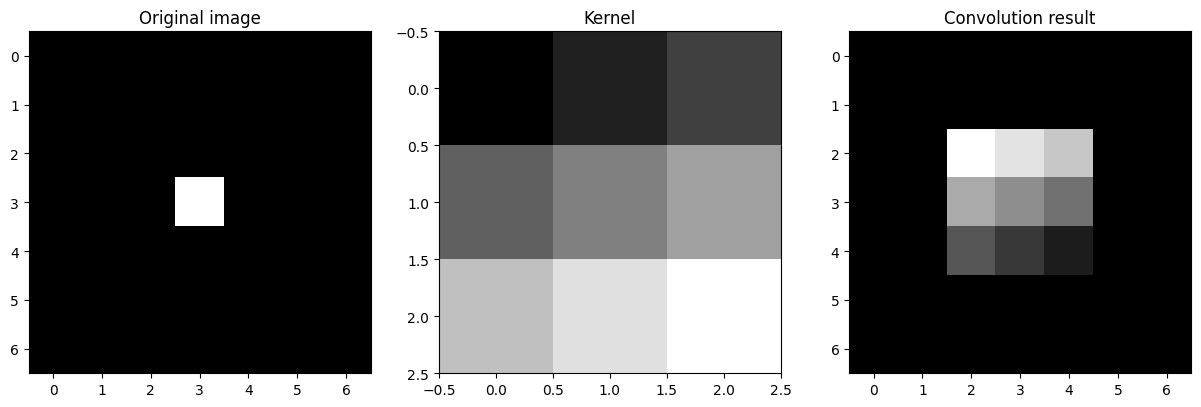

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Visual convolution example
def plot_convolution_demo():
    image = np.zeros((7,7))
    image[3,3] = 1  # Dirac delta
    kernel = np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow(image, cmap='gray'), ax[0].set_title('Original image')
    ax[1].imshow(kernel, cmap='gray'), ax[1].set_title('Kernel')

    # Manual convolution
    result = np.zeros_like(image)
    for i in range(1,6):
        for j in range(1,6):
            result[i,j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)

    ax[2].imshow(result, cmap='gray'), ax[2].set_title('Convolution result')
    plt.show()

plot_convolution_demo()

## **2.2 Filters**
### **2.2.1 Mean Filter**
**Theory**:  
Smoothing through local averaging. Effective against Gaussian noise but blurs edges.

3x3 Kernel:
$$ K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} $$

In [4]:
from ipywidgets import interact

def mean_filter_demo(image_path='noisy_image.jpg'):
    img = cv2.imread(image_path, 0)
    
    @interact(kernel_size=(3,15,2))
    def apply_mean_filter(kernel_size=3):
        filtered = cv2.blur(img, (kernel_size, kernel_size))
        plt.figure(figsize=(10,5))
        plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
        plt.subplot(122), plt.imshow(filtered, cmap='gray'), plt.title(f'Mean Filter {kernel_size}x{kernel_size}')
        plt.show()
    
mean_filter_demo('salt_pepper.png')

interactive(children=(IntSlider(value=3, description='kernel_size', max=15, min=3, step=2), Output()), _dom_cl…

### **2.2.2 Gaussian Filter**
**Theory**:  
Smoothing with weights following 2D Gaussian distribution:
$$ G(x,y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}} $$

Properties:
- σ controls smoothing (higher σ → more blur)
- Better edge preservation than mean filter

In [10]:
def gaussian_filter_demo(image_path='noisy_image.jpg'):
    img = cv2.imread(image_path)
    
    @interact(sigma=(0.1, 5.0, 0.1), kernel_size=(3,15,2))
    def apply_gaussian(sigma=1.0, kernel_size=5):
        filtered = cv2.GaussianBlur(img, (kernel_size,kernel_size), sigma)
        plt.figure(figsize=(10,5))
        plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
        plt.subplot(122), plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)), plt.title(f'Gaussian (σ={sigma}, {kernel_size}x{kernel_size})')
        plt.show()
        
gaussian_filter_demo('lena.png')

interactive(children=(FloatSlider(value=1.0, description='sigma', max=5.0, min=0.1), IntSlider(value=5, descri…

### **2.2.3 Median Filter**
**Theory**:
Non-linear filter replacing each pixel with neighborhood median. Effective against impulse noise (salt & pepper).

Advantages:
- Preserves sharp edges
- Removes outliers without blurring

Mathematical definition for window $W$:
$$ I_{filtered}(x,y) = \text{median}\{I(i,j) | (i,j) \in W(x,y)\} $$

In [10]:
def median_filter_demo(image_path='salt_pepper.jpg'):
    img = cv2.imread(image_path, 0)

    @interact(kernel_size=(3, 15, 2))
    def apply_median(kernel_size=3):
        filtered = cv2.medianBlur(img, kernel_size)
        plt.figure(figsize=(10,5))
        plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
        plt.subplot(122), plt.imshow(filtered, cmap='gray'), plt.title(f'Median Filter {kernel_size}x{kernel_size}')
        plt.show()

median_filter_demo()

interactive(children=(IntSlider(value=3, description='kernel_size', max=15, min=3, step=2), Output()), _dom_cl…

## **2.3 Quality Enhancement**
### **2.3.1 Contrast Adjustment**
**Theory**:
Intensity transformations to expand histogram:
- **Histogram equalization**:
  $$ s_k = T(r_k) = (L-1)\sum_{j=0}^k p_r(r_j) $$
  
- **Gamma correction**:
  $$ s = c \cdot r^\gamma $$
  - γ < 1: Brightens dark areas
  - γ > 1: Enhances contrast in bright areas

In [5]:

def contrast_adjustment_demo(image_path='low_contrast.jpg'):
    img = cv2.imread(image_path, 0)
    
    # Equalization
    equ = cv2.equalizeHist(img)
    
    # Gamma transformation
    def apply_gamma_correction(gamma=1.0):
        corrected = np.array(255*(img/255)**gamma, dtype=np.uint8)
        return corrected
    
    @interact(gamma=(0.1, 3.0, 0.1))
    def update(gamma=1.0):
        gamma_corrected = apply_gamma_correction(gamma)
        
        plt.figure(figsize=(15,5))
        plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
        plt.subplot(132), plt.imshow(equ, cmap='gray'), plt.title('Equalization')
        plt.subplot(133), plt.imshow(gamma_corrected, cmap='gray'), plt.title(f'Gamma (γ={gamma})')
        plt.show()
        
contrast_adjustment_demo('lena.png')

interactive(children=(FloatSlider(value=1.0, description='gamma', max=3.0, min=0.1), Output()), _dom_classes=(…

### **2.3.2 Sharpening**
**Theory**:
Edge enhancement through high frequencies. Common technique: Unsharp Masking

$$ I_{sharp} = I + \lambda(I - I_{blur}) $$

Where:
- $I_{blur}$ = Smoothed version of image
- $\lambda$ = Enhancement factor (typical 1.5-2.5)

In [8]:
def sharpening_demo(image_path='blurry.jpg'):
    img = cv2.imread(image_path, 0)
    
    @interact(alpha=(0.0, 3.0, 0.1), kernel_size=(3, 31, 2))
    def apply_sharpening(alpha=1.5, kernel_size=5):
        blurred = cv2.GaussianBlur(img, (kernel_size,kernel_size), 0)
        sharp = cv2.addWeighted(img, 1 + alpha, blurred, -alpha, 0)
        
        plt.figure(figsize=(15,5))
        plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
        plt.subplot(132), plt.imshow(blurred, cmap='gray'), plt.title('Blurred image')
        plt.subplot(133), plt.imshow(sharp, cmap='gray'), plt.title(f'Sharpened (α={alpha})')
        plt.show()
        
sharpening_demo('lena.png')

interactive(children=(FloatSlider(value=1.5, description='alpha', max=3.0), IntSlider(value=5, description='ke…

### **2.3.3 Noise Removal**
**Method comparison**:
1. **Gaussian noise** → Gaussian Filter
2. **Salt & Pepper noise** → Median Filter
3. **Poisson noise** → Bilateral Filter

**Bilateral Filter**:
$$ I_{filtered}(x) = \frac{1}{W} \sum_{y\in\Omega} I(y) \cdot f(\|x-y\|) \cdot g(\|I(x)-I(y)\|) $$
Where:
- $f$ = Spatial function (Gaussian)
- $g$ = Range function (intensity)

In [12]:
def noise_removal_demo(image_path='lena.png'):
    img = cv2.imread(image_path)
    
    # Generate different noise types
    def add_noise(image, noise_type='gaussian'):
        row,col,ch = image.shape
        if noise_type == 'gaussian':
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            noisy = image + gauss*255
            return np.clip(noisy, 0, 255).astype(np.uint8)
        elif noise_type == 's&p':
            s_vs_p = 0.5
            amount = 0.04
            out = np.copy(image)
            # Salt
            num_salt = np.ceil(amount * image.size * s_vs_p)
            coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
            out[coords[0], coords[1], :] = 255
            # Pepper
            num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
            coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
            out[coords[0], coords[1], :] = 0
            return out
        
    @interact(noise_type=['gaussian', 's&p'], filter_type=['gaussian', 'median', 'bilateral'])
    def compare_filters(noise_type='gaussian', filter_type='gaussian'):
        noisy = add_noise(img, noise_type)
        
        if filter_type == 'gaussian':
            filtered = cv2.GaussianBlur(noisy, (5,5), 0)
        elif filter_type == 'median':
            filtered = cv2.medianBlur(noisy, 5)
        else:
            filtered = cv2.bilateralFilter(noisy, 9, 75, 75)
            
        plt.figure(figsize=(15,5))
        plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
        plt.subplot(132), plt.imshow(cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)), plt.title(f'{noise_type} noise')
        plt.subplot(133), plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)), plt.title(f'{filter_type} filter')
        plt.show()
        
noise_removal_demo('salt_pepper.png')

interactive(children=(Dropdown(description='noise_type', options=('gaussian', 's&p'), value='gaussian'), Dropd…

## **References**
1. Gonzalez, R. C., & Woods, R. E. (2018). *Digital Image Processing*
2. Szeliski, R. (2022). *Computer Vision: Algorithms and Applications*
3. OpenCV Documentation (2023)